In [1]:
import numpy as np
import pylab as plt

In [2]:
#abrimos las matrices de adyacencia por amistad.
Friendship1  = np.loadtxt('friendship1.txt')
Friendship2  = np.loadtxt('friendship2.txt') 
Friendship3  = np.loadtxt('friendship3(copia).txt')

In [3]:
F1=np.matrix(Friendship1)
F2=np.matrix(Friendship2)
F3=np.matrix(Friendship3)

In [4]:
imalos=[]
for i in range(160):
    if 1.0*(F1[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F2[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F3[i,:]==10).sum()==160:
        imalos.append(i)

In [5]:
160-len(list(set(imalos)))

134

In [6]:
imalos=list(set(imalos))
imalos.sort()

In [7]:
F1=np.delete(F1, imalos,0)
F1=np.delete(F1, imalos,1)

F2=np.delete(F2, imalos,0)
F2=np.delete(F2, imalos,1)

F3=np.delete(F3, imalos,0)
F3=np.delete(F3, imalos,1)

Chequeo

In [8]:
np.shape(F1),np.shape(F2),np.shape(F3)

((134, 134), (134, 134), (134, 134))

In [9]:
1.0*(F1==10).sum(), 1.0*(F2==10).sum(), 1.0*(F3==10).sum()

(0.0, 0.0, 0.0)

In [10]:
(1.0*(F1==0).sum()+1.0*(F1==1).sum()+1.0*(F1==2).sum(),1.0*(F2==0).sum()+1.0*(F2==1).sum()+1.0*(F2==2).sum(),
1.0*(F3==0).sum()+1.0*(F3==1).sum()+1.0*(F3==2).sum())

(17956.0, 17956.0, 17956.0)

In [11]:
134*134

17956

In [12]:
import networkx as nx

In [13]:
f1=F1.copy()
f1_sin_peso=(f1==0)==False
f1_sin_peso=np.where(f1_sin_peso==True,1,f1_sin_peso)
f2=F2.copy()
f2_sin_peso=(f2==0)==False
f2_sin_peso=np.where(f2_sin_peso==True,1,f2_sin_peso)
f3=F3.copy()
f3_sin_peso=(f3==0)==False
f3_sin_peso=np.where(f3_sin_peso==True,1,f3_sin_peso)


In [14]:
G1=nx.from_numpy_matrix(f1_sin_peso,create_using=nx.DiGraph())
G2=nx.from_numpy_matrix(f2_sin_peso,create_using=nx.DiGraph())
G3=nx.from_numpy_matrix(f3_sin_peso,create_using=nx.DiGraph())

SUSTANCIAS

In [15]:
alcohol= np.loadtxt('alcohol(copia).txt',dtype=int, usecols=(0,1,2))
alcohol=np.matrix(alcohol)
alcohol=np.delete(alcohol, imalos,0)


cannabis= np.loadtxt('cannabis(copia).txt',dtype=int, usecols=(0,1,2))
cannabis=np.matrix(cannabis)
cannabis=np.delete(cannabis, imalos,0)

tobacco = np.loadtxt('tobacco(copia).txt',dtype=int, usecols=(0,1,2))
tobacco =np.matrix(tobacco)
tobacco=np.delete(tobacco, imalos,0)

In [16]:
np.shape(alcohol),np.shape(cannabis),np.shape(tobacco)

((134, 3), (134, 3), (134, 3))

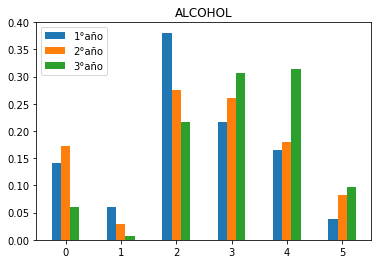

In [17]:
plt.hist(alcohol,[0,1,2,3,4,5,6] ,histtype='bar', rwidth=0.5,align='left', label=['1°año','2°año','3°año'], density=True)
plt.title('ALCOHOL')
plt.legend()
plt.show()

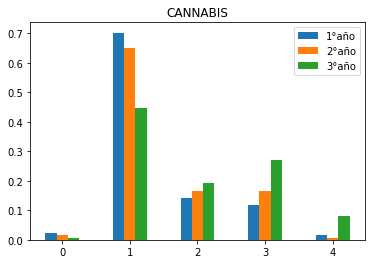

In [18]:
plt.hist(cannabis,[0,1,2,3,4,5] ,histtype='bar', rwidth=0.5,align='left', label=['1°año','2°año','3°año'], density=True)
plt.title("CANNABIS")
plt.legend()
plt.show()

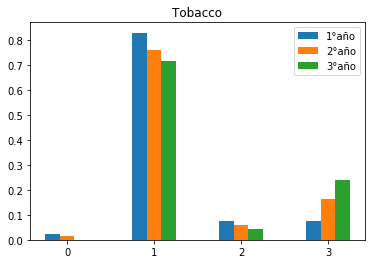

In [19]:
plt.hist(tobacco,[0,1,2,3,4] ,histtype='bar', rwidth=0.5,align='left', label=['1°año','2°año','3°año'], density=True)
plt.xticks([0,1,2,3])
plt.title("Tobacco")
plt.legend()
plt.show()

# Le asigno consumos como atributos a los nodos

In [20]:
def AssignConsumption(G,A,C,T): #G:Grafo,A:Alcohol,C=Canabis,T:Tobaco
    for n in G.nodes:
        G.nodes[n]['Alcohol'] = np.float(A[n])
        G.nodes[n]['Cannabis'] = np.float(C[n])
        G.nodes[n]['Tobacco'] = np.float(T[n])
    return

In [21]:
AssignConsumption(G1,alcohol[:,0],cannabis[:,0],tobacco[:,0])
AssignConsumption(G2,alcohol[:,1],cannabis[:,1],tobacco[:,1])
AssignConsumption(G3,alcohol[:,2],cannabis[:,2],tobacco[:,2])


In [22]:
#NODOS QUE NO COMPLETARON ENCUESTA
no_info_tobacco1=[]
no_info_tobacco2=[]
no_info_alcohol1=[]
no_info_alcohol2=[]
no_info_cannabis1=[]
no_info_cannabis2=[]
for i in range(134):
    if list(dict(G1.nodes('Tobacco')).values())[i]==0:
        no_info_tobacco1.append(i)
    if list(dict(G2.nodes('Tobacco')).values())[i]==0:
        #no_info_tobacco1.append(i)
        no_info_tobacco2.append(i)
    if list(dict(G3.nodes('Tobacco')).values())[i]==0:
        no_info_tobacco2.append(i)
    if list(dict(G1.nodes('Cannabis')).values())[i]==0:
        no_info_cannabis1.append(i)
    if list(dict(G2.nodes('Cannabis')).values())[i]==0:
        #no_info_cannabis1.append(i)
        no_info_cannabis2.append(i)
    if list(dict(G3.nodes('Cannabis')).values())[i]==0:
        no_info_cannabis2.append(i)
    if list(dict(G1.nodes('Alcohol')).values())[i]==0:
        no_info_alcohol1.append(i)
    if list(dict(G2.nodes('Alcohol')).values())[i]==0:
        #no_info_alcohol1.append(i)
        no_info_alcohol2.append(i)
    if list(dict(G3.nodes('Alcohol')).values())[i]==0:
        no_info_alcohol2.append(i)        
        
no_info_tobacco1=np.sort(list(set(no_info_tobacco1)))
no_info_tobacco2=np.sort(list(set(no_info_tobacco2)))
no_info_cannabis1=np.sort(list(set(no_info_cannabis1)))
no_info_cannabis2=np.sort(list(set(no_info_cannabis2)))
no_info_alcohol1=np.sort(list(set(no_info_alcohol1)))
no_info_alcohol2=np.sort(list(set(no_info_alcohol2)))

In [23]:
def TobaccoSimilarity(G,dupla): #dupla=(i,j)
    s=-0.5*np.abs(list(dict(G.nodes('Tobacco')).values())[dupla[0]]-list(dict(G.nodes('Tobacco')).values())[dupla[1]])+1
    return s
def AlcoholSimilarity(G,dupla): #dupla=(i,j)
    s=-0.25*np.abs(list(dict(G.nodes('Alcohol')).values())[dupla[0]]-list(dict(G.nodes('Alcohol')).values())[dupla[1]])+1
    return s
def CannabisSimilarity(G,dupla): #dupla=(i,j)
    s=-np.abs(list(dict(G.nodes('Alcohol')).values())[dupla[0]]-list(dict(G.nodes('Alcohol')).values())[dupla[1]])/3+1
    return s

# Clasificacion de enlaces.

In [24]:
stable_ties_1=list(set(G2.edges()).intersection(set(G1.edges())))
new_ties_1=list(set(G2.edges()).difference(set(G1.edges())))
lost_ties_1=list(set(G1.edges()).difference(set(G2.edges())))
stable_ties_2=list(set(G3.edges()).intersection(set(G2.edges())))
new_ties_2=list(set(G3.edges()).difference(set(G2.edges())))
lost_ties_2=list(set(G2.edges()).difference(set(G3.edges())))

In [25]:
stable_ties_1

[(7, 3),
 (6, 9),
 (114, 120),
 (63, 14),
 (56, 38),
 (17, 20),
 (29, 44),
 (44, 4),
 (58, 36),
 (32, 31),
 (21, 6),
 (98, 79),
 (3, 7),
 (18, 85),
 (43, 42),
 (33, 3),
 (87, 42),
 (57, 45),
 (17, 85),
 (89, 59),
 (98, 86),
 (112, 26),
 (126, 37),
 (115, 106),
 (18, 20),
 (15, 119),
 (45, 78),
 (102, 1),
 (9, 3),
 (109, 58),
 (59, 82),
 (60, 92),
 (10, 13),
 (52, 116),
 (37, 51),
 (100, 108),
 (114, 115),
 (53, 43),
 (13, 10),
 (27, 22),
 (1, 31),
 (66, 71),
 (65, 99),
 (80, 3),
 (30, 130),
 (46, 59),
 (60, 65),
 (128, 31),
 (6, 13),
 (112, 121),
 (3, 80),
 (62, 51),
 (118, 42),
 (93, 100),
 (95, 97),
 (11, 16),
 (0, 27),
 (7, 21),
 (22, 23),
 (124, 127),
 (91, 79),
 (33, 80),
 (46, 82),
 (39, 88),
 (119, 15),
 (33, 7),
 (36, 52),
 (85, 18),
 (114, 106),
 (31, 1),
 (122, 26),
 (20, 21),
 (45, 57),
 (13, 3),
 (130, 30),
 (40, 42),
 (105, 55),
 (94, 92),
 (8, 51),
 (91, 49),
 (19, 131),
 (80, 79),
 (126, 51),
 (31, 128),
 (51, 126),
 (94, 102),
 (54, 49),
 (3, 33),
 (66, 67),
 (90, 44),


# Alcohol

In [26]:
#me deshago de los enlaces que no tenemos informacion
for i in no_info_alcohol1:
    for j in reversed(range(len(stable_ties_1))):
        if len(set(stable_ties_1[j]).intersection({i}))!=0:
            del(stable_ties_1[j])
    for j in reversed(range(len(lost_ties_1))):
        if len(set(lost_ties_1[j]).intersection({i}))!=0:
            del(lost_ties_1[j])
    for j in reversed(range(len(new_ties_1))):
        if len(set(new_ties_1[j]).intersection({i}))!=0:
            del(new_ties_1[j])        
            
for i in no_info_alcohol2:
    for j in reversed(range(len(stable_ties_2))):
        if len(set(stable_ties_2[j]).intersection({i}))!=0:
            del(stable_ties_2[j])
    for j in reversed(range(len(lost_ties_2))):
        if len(set(lost_ties_2[j]).intersection({i}))!=0:
            del(lost_ties_2[j])
    for j in reversed(range(len(new_ties_2))):
        if len(set(new_ties_2[j]).intersection({i}))!=0:
            del(new_ties_2[j])

In [27]:
#210-127 enlaces que perdi por no tener informacion.
#248-151
#255-168

In [28]:
s_lost1=[]
s_new1=[]
s_stable1=[]
for i in range(len(lost_ties_1)):
    s_lost1.append(AlcoholSimilarity(G1,lost_ties_1[i]))
for i in range(len(new_ties_1)):
    s_new1.append(AlcoholSimilarity(G1,new_ties_1[i]))
for i in range(len(stable_ties_1)):
    s_stable1.append(AlcoholSimilarity(G1,stable_ties_1[i]))

s_lost2=[]
s_new2=[]
s_stable2=[]
for i in range(len(lost_ties_2)):
    s_lost2.append(AlcoholSimilarity(G2,lost_ties_2[i]))
for i in range(len(new_ties_2)):
    s_new2.append(AlcoholSimilarity(G2,new_ties_2[i]))
for i in range(len(stable_ties_2)):
    s_stable2.append(AlcoholSimilarity(G2,stable_ties_2[i]))           
                     

In [29]:
plt.hist(s_lost1,5,rwidth=0.5)
plt.title('ALCOHOL lost ties')
plt.show()

NameError: name 's_lost' is not defined

In [ ]:
plt.hist(s_new1,5,rwidth=0.5)
plt.title('ALCOHOL new ties')
plt.show()

In [ ]:
plt.hist(s_stable1,5,rwidth=0.5)
plt.title('ALCOHOL stable ties')
plt.show()

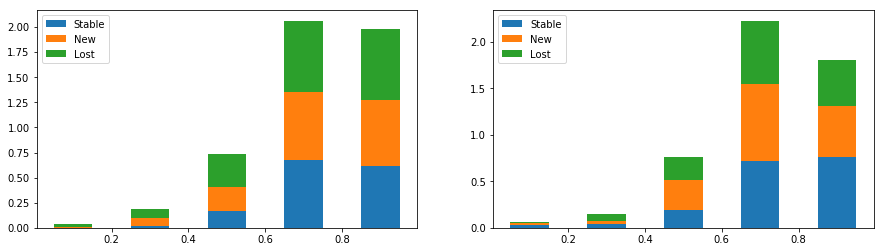

In [34]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.hist([s_stable1,s_new1,s_lost1],5,rwidth=0.5,histtype='barstacked',label=['Stable','New','Lost'],density=True)
plt.legend()
plt.subplot(1,2,2)
plt.hist([s_stable2,s_new2,s_lost2],5,rwidth=0.5,histtype='barstacked',label=['Stable','New','Lost'],density=True)
plt.legend()

# Cannabis

In [ ]:
#me deshago de los enlaces que no tenemos informacion
for i in no_info_cannabis1:
    for j in reversed(range(len(stable_ties_1))):
        if len(set(stable_ties_1[j]).intersection({i}))!=0:
            del(stable_ties_1[j])
    for j in reversed(range(len(lost_ties_1))):
        if len(set(lost_ties_1[j]).intersection({i}))!=0:
            del(lost_ties_1[j])
    for j in reversed(range(len(new_ties_1))):
        if len(set(new_ties_1[j]).intersection({i}))!=0:
            del(new_ties_1[j])        
            
for i in no_info_cannabis2:
    for j in reversed(range(len(stable_ties_2))):
        if len(set(stable_ties_2[j]).intersection({i}))!=0:
            del(stable_ties_2[j])
    for j in reversed(range(len(lost_ties_2))):
        if len(set(lost_ties_2[j]).intersection({i}))!=0:
            del(lost_ties_2[j])
    for j in reversed(range(len(new_ties_2))):
        if len(set(new_ties_2[j]).intersection({i}))!=0:
            del(new_ties_2[j])